<a href="https://colab.research.google.com/github/aarjunsrinivasan/ENP808Y-Assignment2/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


def res_net_block(input_data, filters, conv_size):
      x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
      x = layers.BatchNormalization(momentum=0.9)(x)
      x = layers.Dropout(0.1)(x)
      x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
      x = layers.BatchNormalization(momentum=0.9)(x)
      x = layers.Dropout(0.1)(x)
      x = layers.Add()([x, input_data])
      x = layers.Activation('relu')(x)
      return x


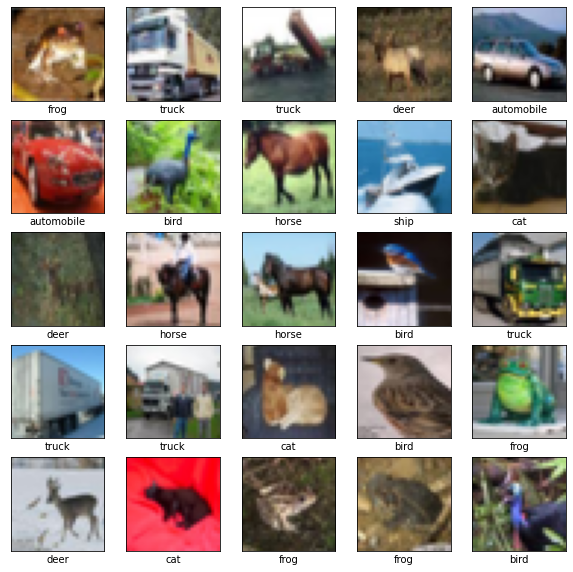

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [0]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.MaxPooling2D(3)(x)
num_res_net_blocks = 20
for i in range(num_res_net_blocks):
    x = res_net_block(x, 64, 3)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization(momentum=0.9)(x)
outputs = layers.Dense(10, activation='softmax')(x)

## TRAINED ON GPU

In [0]:
with tf.device('/device:GPU:0'):
      res_net_model = tf.keras.Model(inputs, outputs)
      res_net_model.compile(optimizer=keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

## USE THIS TO TRAIN ON CPU

In [0]:
# res_net_model = tf.keras.Model(inputs, outputs)
# res_net_model.compile(optimizer=keras.optimizers.Adam(),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['acc'])

In [0]:
hist=res_net_model.fit(x=x_train, 
            y=y_train, epochs=100, steps_per_epoch=200,
              validation_data=(x_test, y_test))

Epoch 1/100
200/200 [==============================] - 26s 129ms/step - loss: 1.4415 - acc: 0.4704 - val_loss: 1.3495 - val_acc: 0.5337
Epoch 2/100
200/200 [==============================] - 25s 127ms/step - loss: 0.9321 - acc: 0.6682 - val_loss: 1.1074 - val_acc: 0.6368
Epoch 3/100
200/200 [==============================] - 26s 128ms/step - loss: 0.7359 - acc: 0.7417 - val_loss: 0.8319 - val_acc: 0.7198
Epoch 4/100
200/200 [==============================] - 25s 126ms/step - loss: 0.6311 - acc: 0.7791 - val_loss: 0.7938 - val_acc: 0.7265
Epoch 5/100
200/200 [==============================] - 25s 127ms/step - loss: 0.5510 - acc: 0.8104 - val_loss: 0.6617 - val_acc: 0.7816
Epoch 6/100
200/200 [==============================] - 26s 128ms/step - loss: 0.4933 - acc: 0.8271 - val_loss: 0.6391 - val_acc: 0.7792
Epoch 7/100
200/200 [==============================] - 25s 127ms/step - loss: 0.4411 - acc: 0.8461 - val_loss: 0.6158 - val_acc: 0.7971
Epoch 8/100
200/200 [===========================

### LOSS CURVE





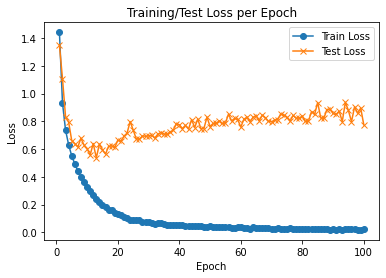

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Test Loss'], loc = 0)
ax.set_title('Training/Test Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss') 
plt.show()


### ACCURACY CURVE


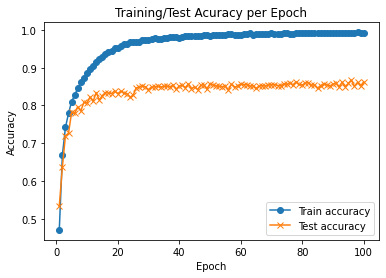

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
ax.legend(['Train accuracy', 'Test accuracy'], loc = 0)
ax.set_title('Training/Test Acuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy') 
plt.show()

In [0]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [0]:
testy=y_test.squeeze()
trainy=y_train.squeeze()
ytest_pred=res_net_model.predict(x_test)
ytrain_pred=res_net_model.predict(x_train)

In [0]:
predtesty=[]
for i in ytest_pred:
  predtesty.append(i.argmax())
predtesty=np.array(predtesty);
predtrainy=[]
for i in ytrain_pred:
  predtrainy.append(i.argmax())
predtrainy=np.array(predtrainy);




## TEST CONFUSION MATRIX NORMALIZED 

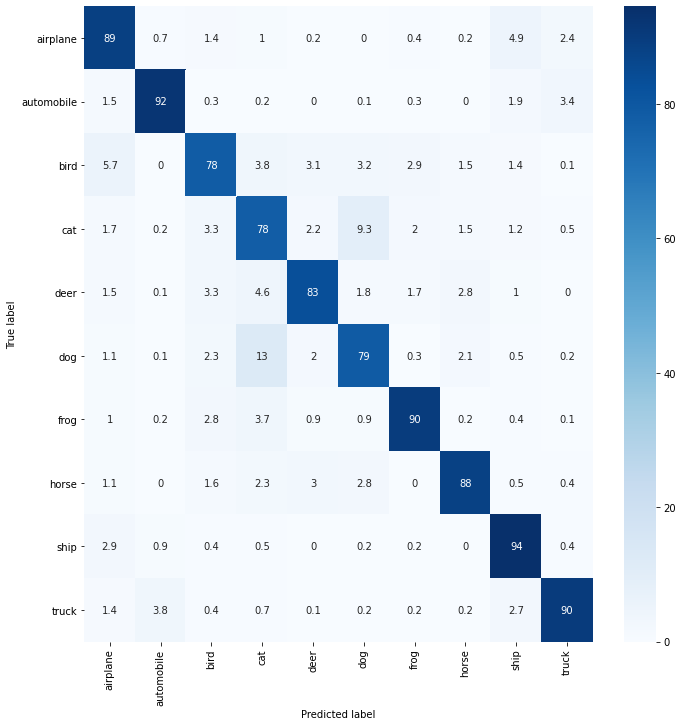

In [0]:
con_mat = tf.math.confusion_matrix(labels=testy, predictions=predtesty).numpy()
con_mat = np.around(con_mat.astype('float') *100/ con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## TEST CONFUSION MATRIX 

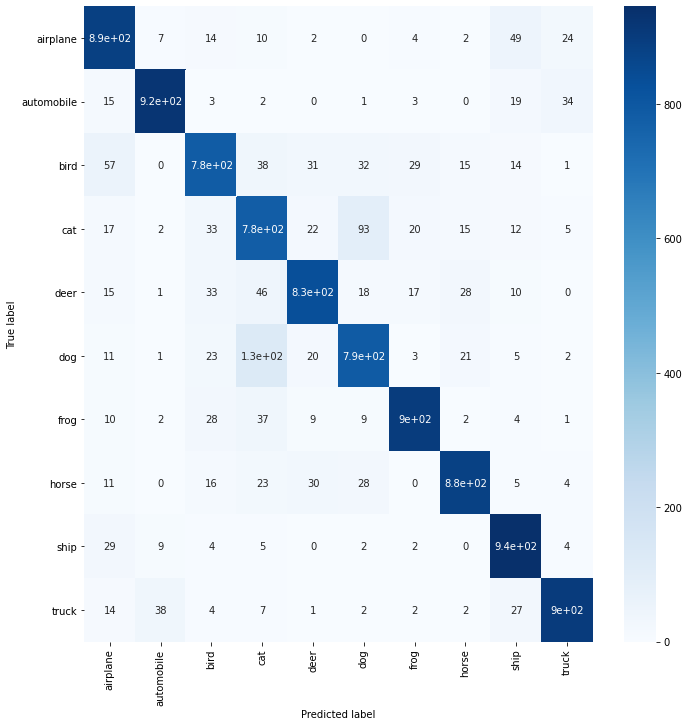

In [0]:
con_mat = tf.math.confusion_matrix(labels=testy, predictions=predtesty).numpy()
con_mat_df = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## TRAIN CONFUSION MATRIX NORMALIZED 

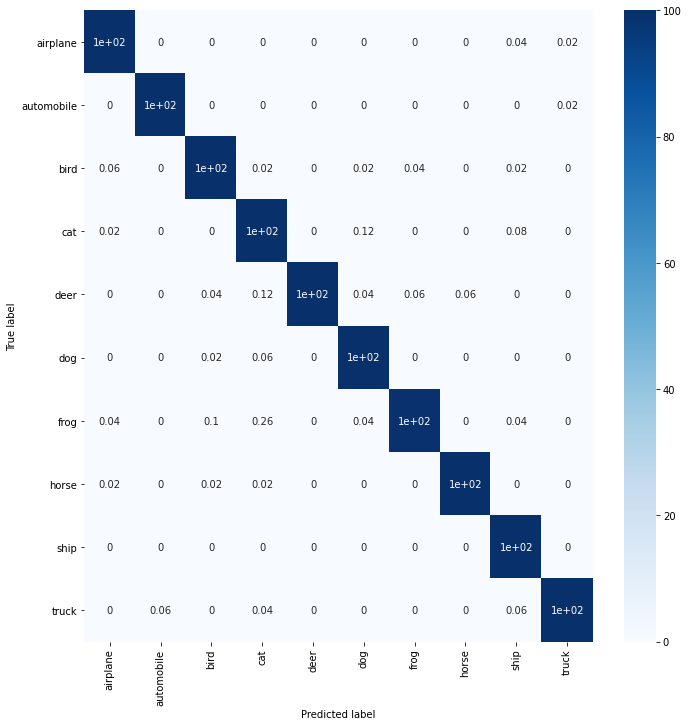

In [0]:
con_mat = tf.math.confusion_matrix(labels=trainy, predictions=predtrainy).numpy()
con_mat = np.around(con_mat.astype('float') *100/ con_mat.sum(axis=1)[:, np.newaxis], decimals=4)
con_mat_df = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## TRAIN CONFUSION MATRIX 

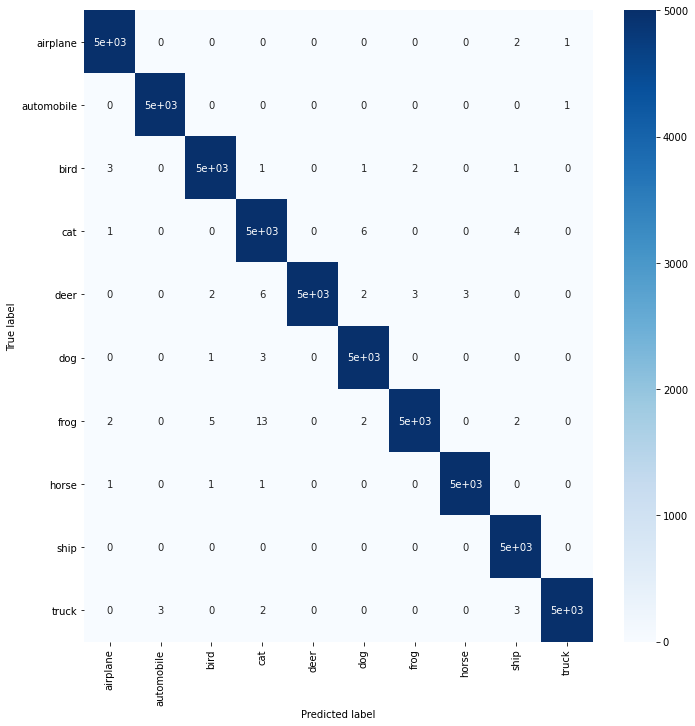

In [0]:
con_mat = tf.math.confusion_matrix(labels=trainy, predictions=predtrainy).numpy()
con_mat_df = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## A SIMPLE CNN MODEL in TENSORFLOW EXAMPLE

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8480 - accuracy: 0.3643 - val_loss: 1.6238 - val_accuracy: 0.4248
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3581 - accuracy: 0.5115 - val_loss: 1.3399 - val_accuracy: 0.5252
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1962 - accuracy: 0.5783 - val_loss: 1.1815 - val_accuracy: 0.5840
Epoch 4/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0866 - accuracy: 0.6165 - val_loss: 1.1686 - val_accuracy: 0.5963
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9994 - accuracy: 0.6508 - val_loss: 1.0535 - val_accuracy: 0.6358
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9435 - accuracy: 0.6727 - val_loss: 1.0651 - val_accuracy: 0.6359
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8759 - accuracy: 0.6953 - val_loss: 1.0263 - val_accuracy:

313/313 - 1s - loss: 1.0994 - accuracy: 0.6427


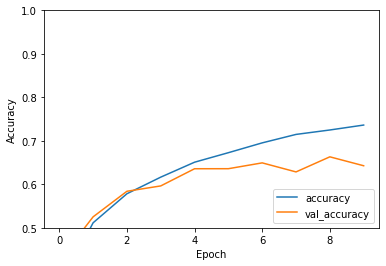

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
